In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
df_titanic = pd.read_csv('titanic.csv', sep=',')

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_titanic.Survived.value_counts() / df_titanic.Survived.value_counts().sum()

0    0.616162
1    0.383838
Name: Survived, dtype: float64

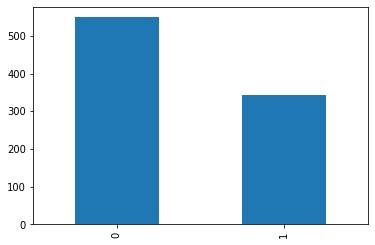

In [6]:
df_titanic.Survived.value_counts().plot.bar()

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


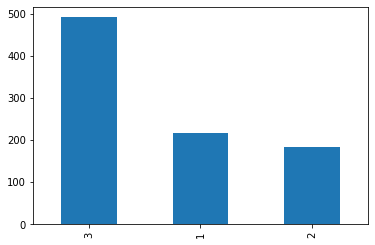

In [7]:
print(df_titanic.Pclass.value_counts() / df_titanic.Pclass.value_counts().sum())
df_titanic.Pclass.value_counts().plot.bar()

In [8]:
df_cross_survived_sex = pd.crosstab(df_titanic.Survived, df_titanic.Sex)
df_cross_survived_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


In [9]:
stats, p_value, dof, _ = chi2_contingency(df_cross_survived_sex)
alpha = 0.05

if p_value < alpha:
    print('Rejeita a hipótese nula. As variaveis são dependentes.')
else:
    print('Aceita a hipótese nula. As variáveis não são dependentes')

Rejeita a hipótese nula. As variaveis são dependentes.


male      0.647587
female    0.352413
Name: Sex, dtype: float64


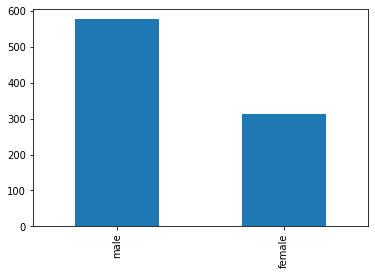

In [10]:
print(df_titanic.Sex.value_counts() / df_titanic.Sex.value_counts().sum())
df_titanic.Sex.value_counts().plot.bar()

In [11]:
df_titanic.Age.isna().sum()

177

In [12]:
df_titanic.Age = df_titanic.Age.fillna(df_titanic.Age.mode()[0])

In [13]:
df_titanic.Age.isna().sum()

0

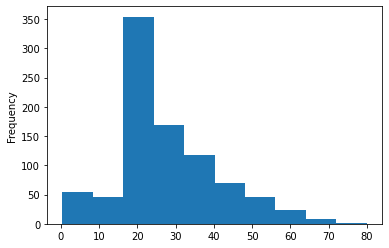

In [14]:
df_titanic.Age.plot.hist()

In [15]:
def discrete_age(x: float) -> str:
    if x < 18:
        return 'Child'
    elif x < 60:
        return 'Adult'
    else: 
        return 'Elder'

In [16]:
df_titanic = df_titanic.assign(age_discrete = df_titanic.Age.apply(discrete_age))
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_discrete
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [17]:
df_titanic.age_discrete.value_counts()

Adult    752
Child    113
Elder     26
Name: age_discrete, dtype: int64

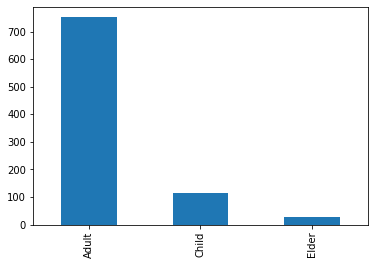

In [18]:
df_titanic.age_discrete.value_counts().plot.bar()

In [19]:
import re

In [20]:
re_title = re.compile('[a-zA-Z]+\.')
df_titanic = df_titanic.assign(Title = df_titanic.Name.apply(lambda x: re_title.findall(x)[0]))
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_discrete,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Mr.


In [21]:
def clean_title(x):
    if x in ['Mr.', 'Miss.', 'Mrs.', 'Master.']:
        return x
    else:
        return 'None'

df_titanic.Title = df_titanic.Title.apply(clean_title)
df_titanic.Title.value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
None        27
Name: Title, dtype: int64

In [22]:
df_cross_survived_title = pd.crosstab(df_titanic.Survived, df_titanic.Title)
df_cross_survived_title

Title,Master.,Miss.,Mr.,Mrs.,None
Survived,,,,,
0,17,55,436,26,15
1,23,127,81,99,12


In [23]:
df_titanic[['Title', 'Survived']].groupby('Title').mean()

,Survived
Title,
Master.,0.575000
Miss.,0.697802
Mr.,0.156673
Mrs.,0.792000
None,0.444444


In [24]:
stats, p_value, dof, _ = chi2_contingency(df_cross_survived_title)
alpha = 0.05

if p_value < alpha:
    print('Rejeita a hipótese nula. As variaveis são dependentes.')
else:
    print('Aceita a hipótese nula. As variáveis não são dependentes')

Rejeita a hipótese nula. As variaveis são dependentes.


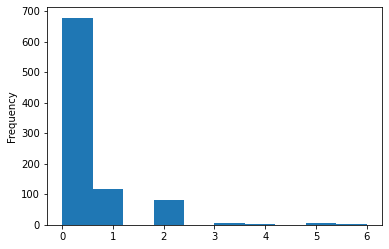

In [25]:
df_titanic.Parch.plot.hist()

In [26]:
df_titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

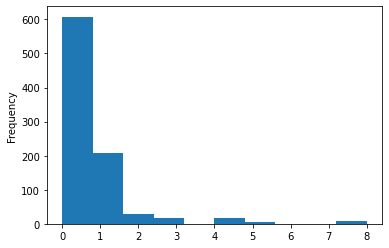

In [27]:
df_titanic.SibSp.plot.hist()

In [28]:
df_titanic.Ticket.apply(lambda x: x.split(' ')[0]).value_counts()

PC        60
C.A.      27
STON/O    12
A/5       10
W./C.      9
          ..
113787     1
2672       1
19947      1
350052     1
27267      1
Name: Ticket, Length: 557, dtype: int64

In [29]:
def split_ticket(x: str) -> str:
    s = x.split(' ')[0]
    try:
        s = int(s)
        return '?'
    except:
        return s

In [30]:
df_titanic = df_titanic.assign(split_ticket = df_titanic.Ticket.apply(split_ticket))
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_discrete,Title,split_ticket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Mr.,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs.,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Miss.,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs.,?
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Mr.,?


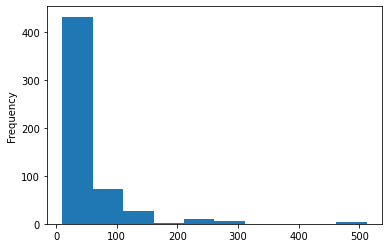

In [31]:
df_titanic[df_titanic.Fare > 10].Fare.plot.hist()

In [32]:
df_titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [33]:
df_titanic.Embarked = df_titanic.Embarked.fillna('?')

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [93]:
def choose_model(alg: str):
    model = None
    if alg == 'logistic_regression':
        model = GridSearchCV(
            LogisticRegression(n_jobs=-1),
            param_grid={
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'class_weight': [None, 'balanced']
            },
            scoring='f1',
            cv=StratifiedKFold(5),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'decision_tree':
        model = GridSearchCV(
            DecisionTreeClassifier(),
            param_grid={
                'criterion': ['gini', 'entropy'], 
                'splitter': ['best', 'random'],
                'min_samples_split': [4, 8, 16, 32, 64], 
                'min_samples_leaf': [1, 2, 4, 8],
                'max_depth': [None, 4, 8, 16],
                'class_weight': [None, 'balanced']
            },
            scoring='f1',
            cv=StratifiedKFold(5),
            n_jobs=-1,
            verbose=1
        )
    elif alg == 'random_forest':
        model = GridSearchCV(
            RandomForestClassifier(n_estimators=50, n_jobs=-1),
            param_grid={
                'criterion': ['gini', 'entropy'], 
                'min_samples_split': [4, 8, 16], 
                'max_depth': [None, 4, 8],
                'class_weight': [None, 'balanced']
            },
            scoring='f1',
            cv=StratifiedKFold(5),
            n_jobs=-1,
            verbose=1
        )

    return model

def return_features(df_train, df_test):
    mm = MinMaxScaler()
    x_train_mm = mm.fit_transform(df_train[['Age', 'SibSp', 'Parch', 'Fare']])
    x_test_mm = mm.transform(df_test[['Age', 'SibSp', 'Parch', 'Fare']])

    ohe = OneHotEncoder(sparse=False)
    x_train_ohe = ohe.fit_transform(df_train[['Pclass', 'Sex', 'Embarked', 'Title']])
    x_test_ohe = ohe.transform(df_test[['Pclass', 'Sex', 'Embarked', 'Title']])

    x_train = np.hstack([x_train_ohe, x_train_mm])
    x_test = np.hstack([x_test_ohe, x_test_mm])

    y_train = df_train.Survived.values
    y_test = df_test.Survived.values

    return x_train, y_train, x_test, y_test

In [94]:
for alg in ['logistic_regression','decision_tree', 'random_forest']:
    folds = 10
    cv = StratifiedKFold(folds, shuffle=True, random_state=42)
    metrics_train = np.zeros(shape=(folds, 4))
    metrics_test = np.zeros(shape=(folds, 4))

    for fold, (train, test) in enumerate(cv.split(df_titanic, df_titanic.Survived.values)):
        df_train = df_titanic.iloc[train]
        df_test = df_titanic.iloc[test]

        x_train, y_train, x_test, y_test = return_features(df_train, df_test)

        model = choose_model(alg)
        model.fit(x_train, y_train)

        y_pred_train = model.predict(x_train)
        accuracy = accuracy_score(y_train, y_pred_train)
        precision, recall, fscore, _ = precision_recall_fscore_support(y_train, y_pred_train, average='binary')
        metrics_train[fold, 0] = accuracy
        metrics_train[fold, 1] = precision
        metrics_train[fold, 2] = recall
        metrics_train[fold, 3] = fscore

        y_pred_test = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred_test)
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')
        metrics_test[fold, 0] = accuracy
        metrics_test[fold, 1] = precision
        metrics_test[fold, 2] = recall
        metrics_test[fold, 3] = fscore

    print('-' * 50)
    print(alg)
    print('-' * 50)
    print('Train - Accuracy:', metrics_train[:,0].mean())
    print('Train - Precision:', metrics_train[:,1].mean())
    print('Train - Recall:', metrics_train[:,2].mean())
    print('Train - Fscore:', metrics_train[:,3].mean())
    print('-' * 50)
    print('Test - Accuracy:', metrics_test[:,0].mean())
    print('Test - Precision:', metrics_test[:,1].mean())
    print('Test - Recall:', metrics_test[:,2].mean())
    print('Test - Fscore:', metrics_test[:,3].mean())
    print()

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished


--------------------------------------------------
logistic_regression
--------------------------------------------------
Train - Accuracy: 0.8277840044084546
Train - Precision: 0.7822458878536013
Train - Recall: 0.7664146114471848
Train - Fscore: 0.7734786877166631
--------------------------------------------------
Test - Accuracy: 0.8181398252184768
Test - Precision: 0.771008885642276
Test - Recall: 0.7512605042016807
Test - Fscore: 0.7594439683105682

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2866 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done 3120 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2993 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done 3120 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2986 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done 2986 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2923 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2923 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2923 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2923 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


--------------------------------------------------
decision_tree
--------------------------------------------------
Train - Accuracy: 0.8474870875246341
Train - Precision: 0.7973666509761635
Train - Recall: 0.8144940564321672
Train - Fscore: 0.8038624832918014
--------------------------------------------------
Test - Accuracy: 0.8024469413233458
Test - Precision: 0.745371427394629
Test - Recall: 0.7456302521008403
Test - Fscore: 0.739371792022854

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s


--------------------------------------------------
random_forest
--------------------------------------------------
Train - Accuracy: 0.885644347309006
Train - Precision: 0.8583734313131831
Train - Recall: 0.8411269512246712
Train - Fscore: 0.8495592844509205
--------------------------------------------------
Test - Accuracy: 0.8226591760299626
Test - Precision: 0.7725736911260122
Test - Recall: 0.7657983193277311
Test - Fscore: 0.7662227582250909



[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.3s finished


In [95]:
x_train, y_train, x_test, y_test = return_features(df_titanic, df_titanic)

model = choose_model('random_forest')
model.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    4.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                            

In [96]:
model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 16}

In [97]:
production_model = RandomForestClassifier(n_estimators=50, class_weight='balanced', max_depth=None, min_samples_split=16, n_jobs=-1)

In [98]:
x_complete = x_train
y_complete = y_train

production_model.fit(x_complete, y_complete)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)